# Plot example simulations produced by param search

In [1]:
%matplotlib inline
from copy import deepcopy as copy
import numpy as np

from disp import set_font_size
from replay import smln, plot, analysis


XYS_RASTER = [
    (-.75, .75), (-.5, .75), (-.25, .75), (0, .75),
    (0, .5), (0, .25), (0, 0), (0, -.25), (0, -.5),
    (0, -.75), (.25, -.75), (.5, -.75), (.75, -.75)
]

In [2]:
def rerun_smln(f_name, smln_id, rng_seed, epochs=None, t_lim=None):
    
    df, rslts, header = analysis.make_df(f_name)
    
    if epochs is None:
        epochs = []
        
    # rerun smln
    m_params = copy(header['m_params'])
    s_params = copy(header['s_params'])

    rslt = rslts[smln_id]
    assert rslt['SMLN_ID'] == smln_id

    for param in header['params_varied']:
        m_params[param] = rslt['PARAMS'][param]

    s_params['RNG_SEED'] = rng_seed

    print('Running smln...')
    rslt_rerun = smln.run(m_params, s_params)
    print('Smln complete.')

    # analyze results
    print('Desired metrics:')
    print(rslt['METRICS'][str(rng_seed)])
    print('Actual metrics:')
    print(analysis.get_metrics(rslt_rerun, header['a_params']))

    # plot results
    ## potentiation profile
    ax, c_ax = plot.ltp_ie_profile(rslt_rerun)

    ## add PC labels
    for ctr, (x, y) in enumerate(XYS_RASTER):
        ax.text(x, y, str(ctr), fontsize=14, horizontalalignment='center', verticalalignment='center')

    ## selected replay epoch spike sequences
    for epoch in epochs:
        fig, axs = plot.spike_seq(rslt_rerun, epoch=epoch)

    ## raster for selected PCs
    fig, axs = plot.raster_with_pc_inh(
        rslt_rerun,
        XYS_RASTER,
        colors=np.zeros(len(XYS_RASTER)),
        cmap='inferno',
        nearest=1,
        epoch=(0, 10),
        trg_plt=[],
        y_lim=(-1, 13),
        y_ticks=[0, 3, 6, 9, 12],
        smoothness=4)
    
    if t_lim is not None:
        for ax in axs:
            ax.set_xlim(t_lim)

    ## shade selected replay epochs
    for epoch in epochs:
        axs[0].axvspan(*epoch, color='b', alpha=0.15)
        axs[1].axvspan(*epoch, color='b', alpha=0.15)
        axs[2].axvspan(*epoch, color='b', alpha=0.15)
        
    return rslt_rerun

### SWEEP 0: W_PC_PC vs L_PC_PC

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_ntrj': 0.5097330699702936, 'fr_trj': 5.924605669804635, 'evt_dur': 0.1289333333333335, 'evt_ct': 30, 'one_way_ct': 22}
Actual metrics:
{'fr_ntrj': 0.5097330699702936, 'one_way_ct': 22, 'evt_dur': 0.1289333333333335, 'evt_ct': 30, 'fr_trj': 5.924605669804635}


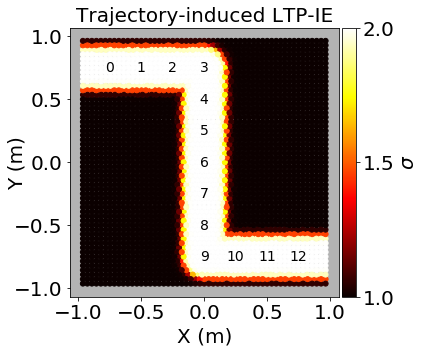

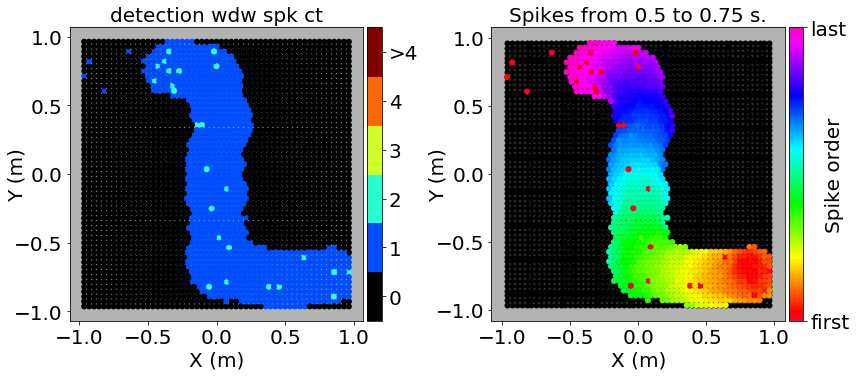

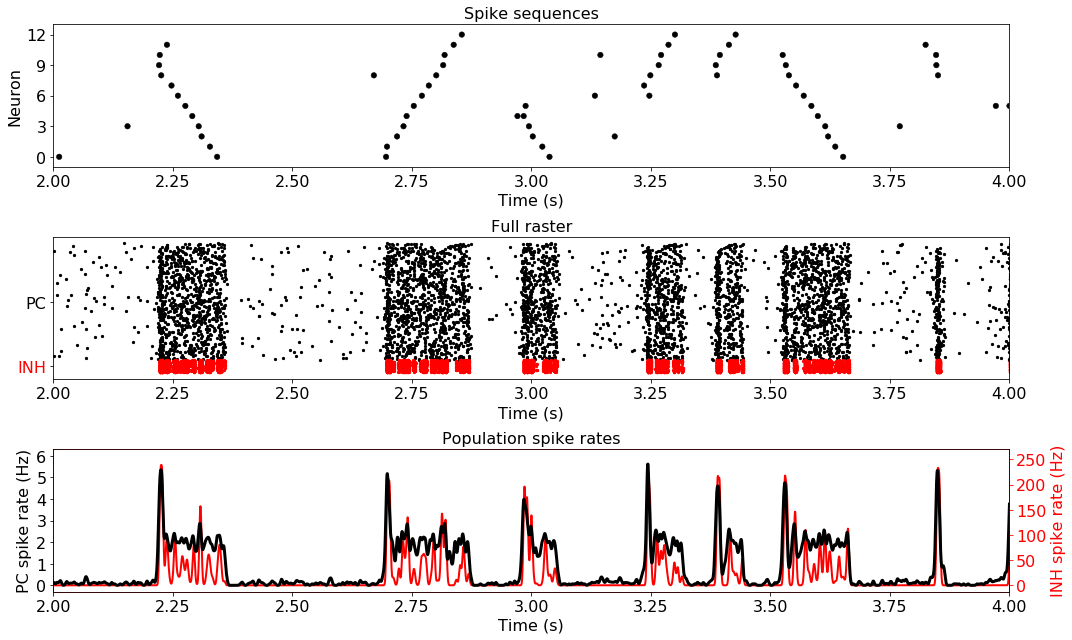

In [7]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_0_W_PC_PC_L_PC_PC.txt',
    smln_id=78,
    rng_seed=0,
    epochs=[(.5, .75)],
    t_lim=(2, 4));

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_ntrj': 0.26539574425134754, 'fr_trj': 4.9435582123171145, 'evt_dur': 0.12995348837209308, 'evt_ct': 43, 'one_way_ct': 26}
Actual metrics:
{'fr_ntrj': 0.26539574425134754, 'one_way_ct': 26, 'evt_dur': 0.12995348837209308, 'evt_ct': 43, 'fr_trj': 4.9435582123171145}


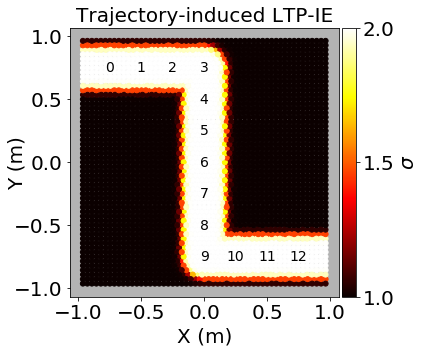

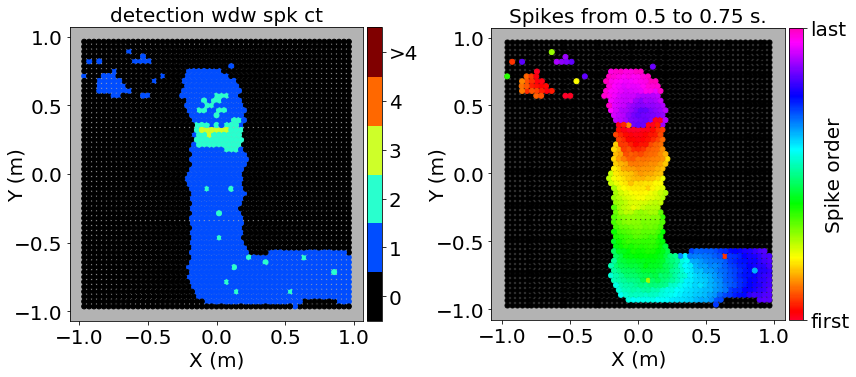

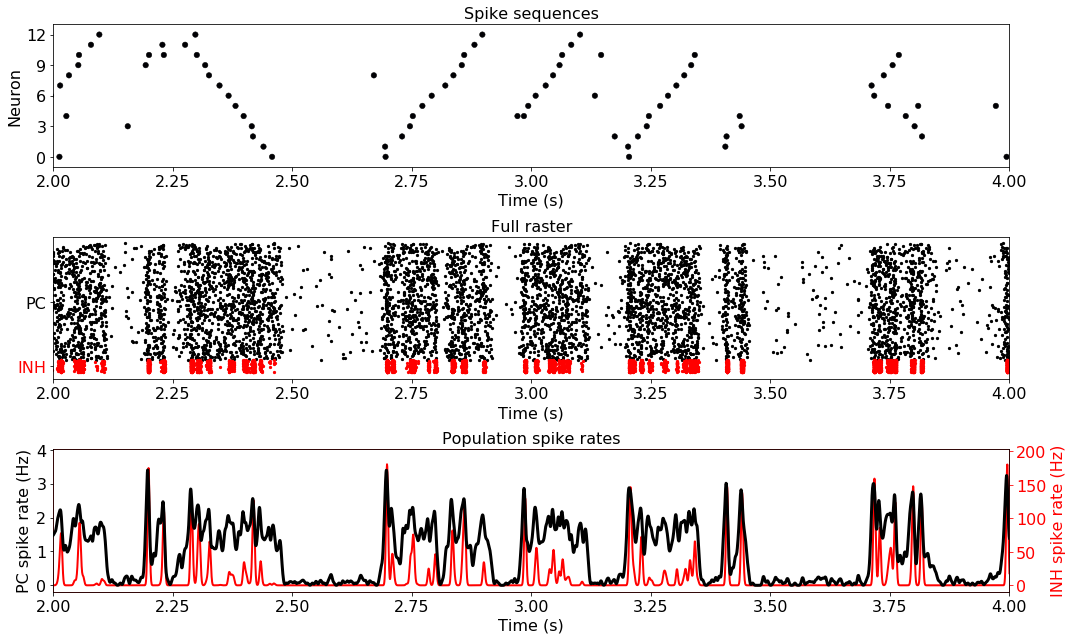

In [8]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_0_W_PC_PC_L_PC_PC.txt',
    smln_id=422,
    rng_seed=0,
    epochs=[(.5, .75)],
    t_lim=(2, 4));

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'one_way_ct': 0, 'evt_dur': 3.524, 'evt_ct': 2, 'fr_trj': 5.794639482480665, 'fr_ntrj': 1.9826020191330214}
Actual metrics:
{'one_way_ct': 0, 'evt_dur': 3.524, 'evt_ct': 2, 'fr_trj': 5.794639482480665, 'fr_ntrj': 1.9826020191330214}


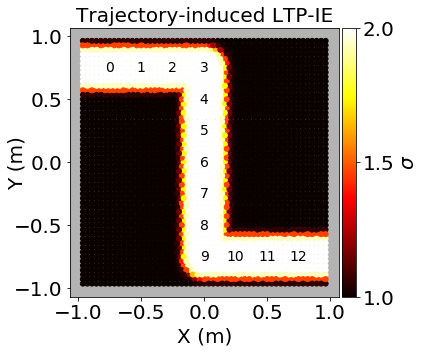

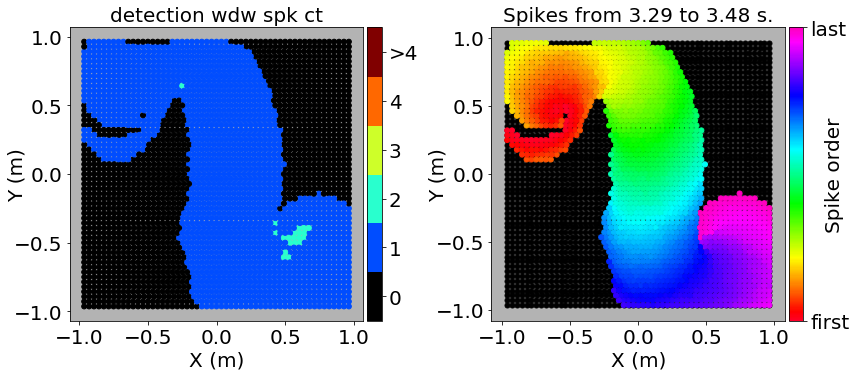

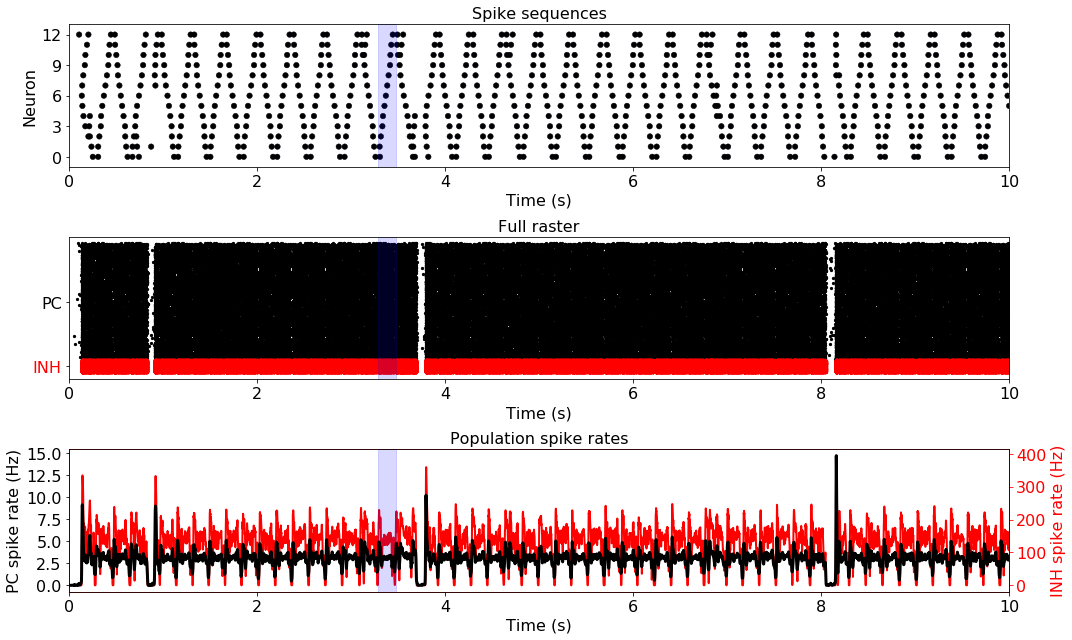

In [8]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_0_W_PC_PC_L_PC_PC.txt',
    smln_id=327,
    rng_seed=2,
    epochs=[(3.29, 3.48)]);

### SWEEP 1: W_PC_PC vs W_PC_INH

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_ntrj': 0.771251105968565, 'one_way_ct': 16, 'evt_dur': 0.15091666666666664, 'evt_ct': 36, 'fr_trj': 6.716257082943122}
Actual metrics:
{'fr_ntrj': 0.771251105968565, 'one_way_ct': 16, 'evt_dur': 0.15091666666666664, 'evt_ct': 36, 'fr_trj': 6.716257082943122}


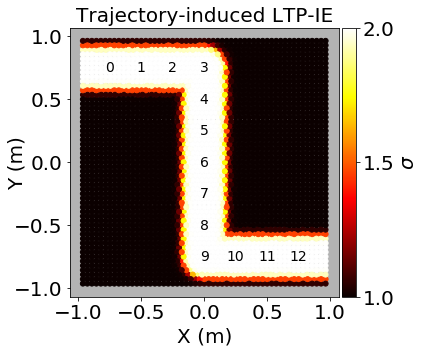

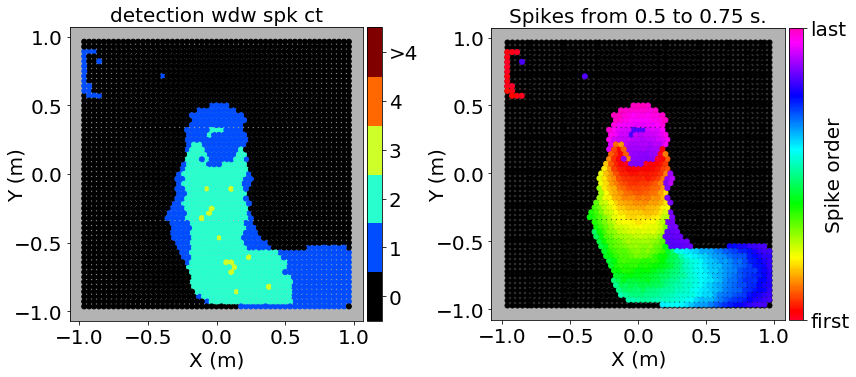

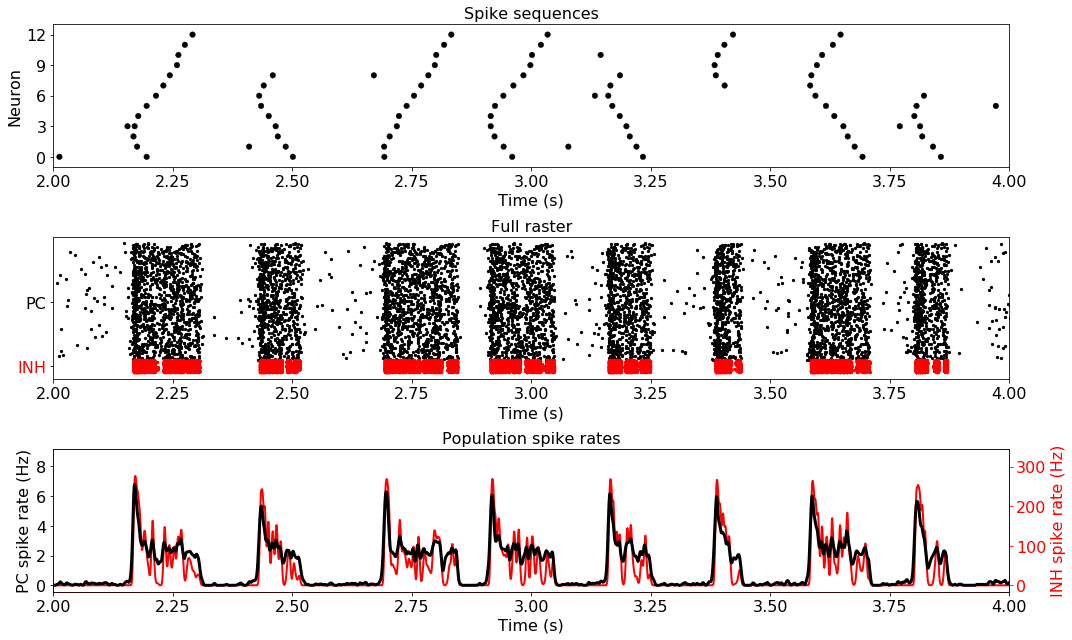

In [3]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_1_W_PC_PC_W_PC_INH.txt',
    smln_id=94,
    rng_seed=0,
    epochs=[(.5, .75)],
    t_lim=(2, 4));

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_ntrj': 0.43283579295219904, 'one_way_ct': 32, 'evt_dur': 0.11436250000000003, 'evt_ct': 40, 'fr_trj': 5.348041714904582}
Actual metrics:
{'fr_ntrj': 0.43283579295219904, 'one_way_ct': 32, 'evt_dur': 0.11436250000000003, 'evt_ct': 40, 'fr_trj': 5.348041714904582}


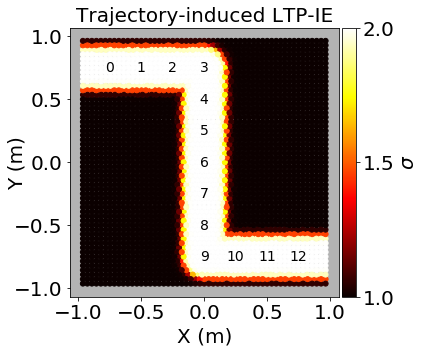

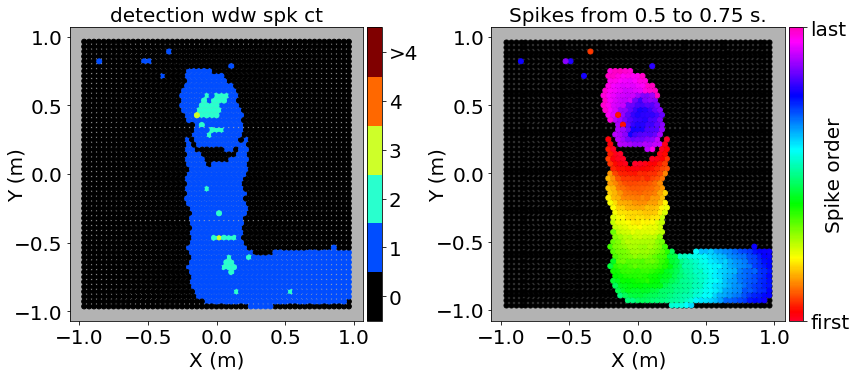

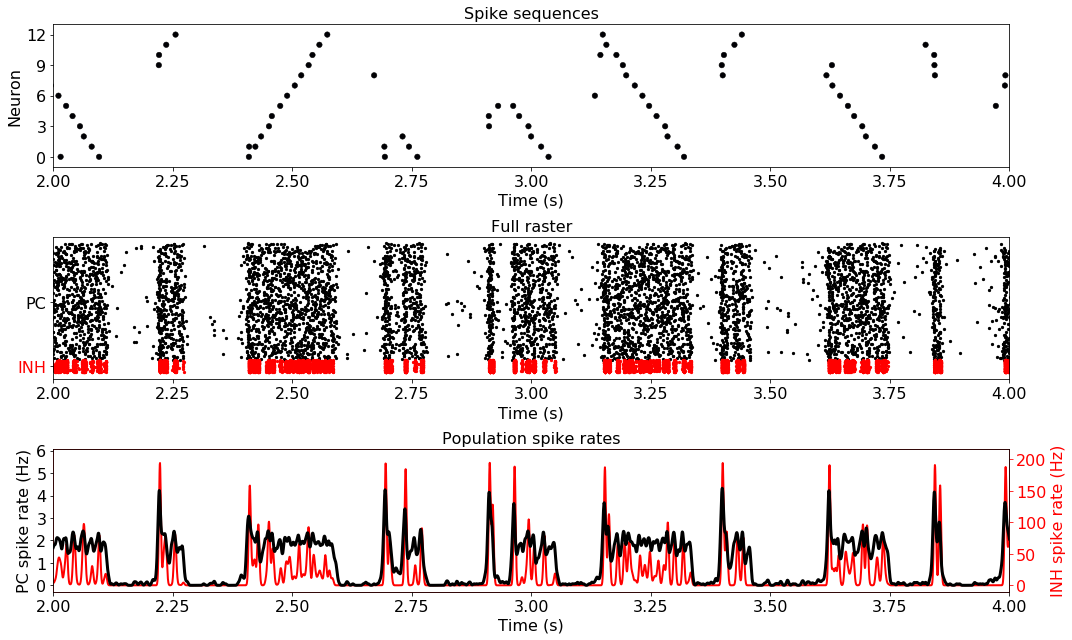

In [9]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_1_W_PC_PC_W_PC_INH.txt',
    smln_id=241,
    rng_seed=0,
    epochs=[(.5, .75)],
    t_lim=(2, 4));

### SWEEP 2: W_PC_PC vs SGM_MAX

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_trj': -1, 'evt_ct': 0, 'one_way_ct': 0, 'fr_ntrj': -1, 'evt_dur': -1}
Actual metrics:
{'fr_ntrj': -1, 'evt_ct': 0, 'one_way_ct': 0, 'evt_dur': -1, 'fr_trj': -1}


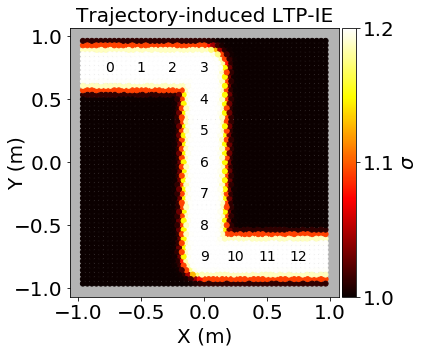

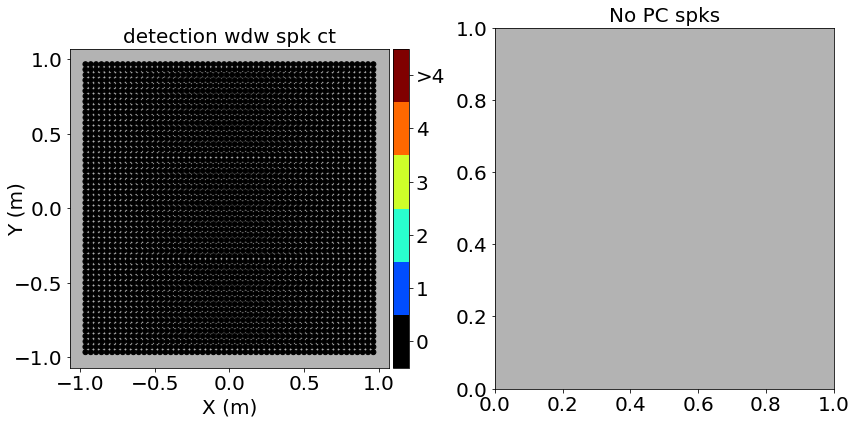

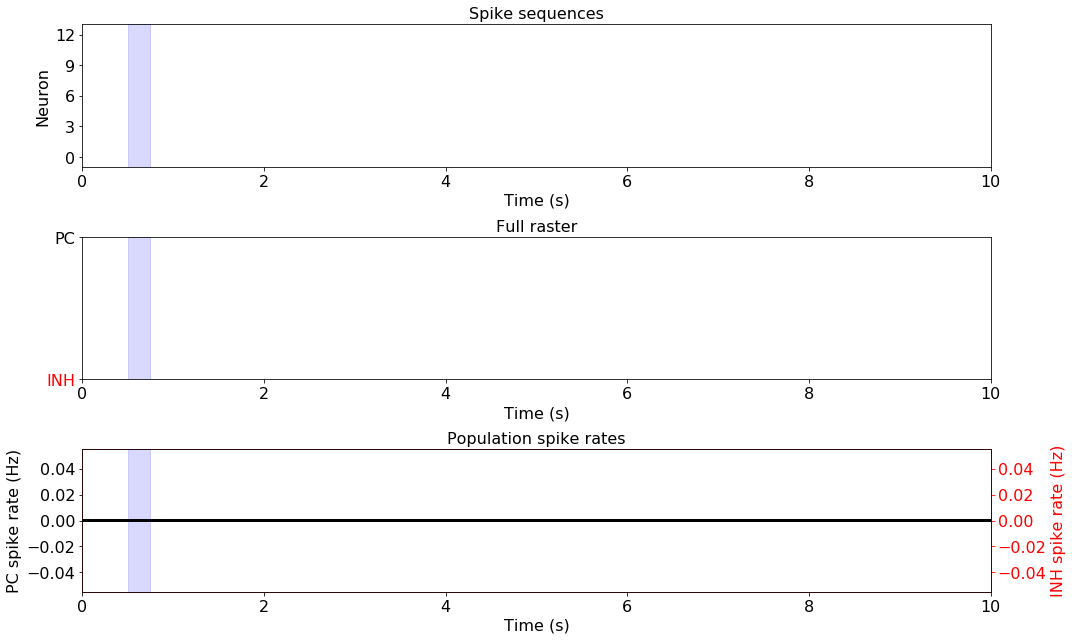

In [5]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_2_W_PC_PC_SGM_MAX.txt',
    smln_id=0,
    rng_seed=0,
    epochs=[(.5, .75)]);

### SWEEP 3: L_PC_PC vs W_PC_INH

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_ntrj': -1, 'evt_ct': 0, 'one_way_ct': 0, 'evt_dur': -1, 'fr_trj': -1}
Actual metrics:
{'fr_ntrj': -1, 'evt_ct': 0, 'one_way_ct': 0, 'evt_dur': -1, 'fr_trj': -1}


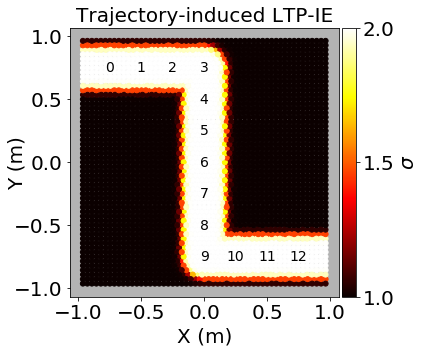

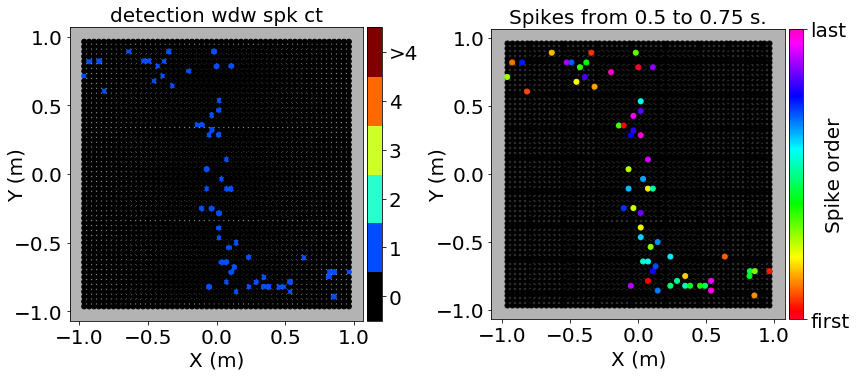

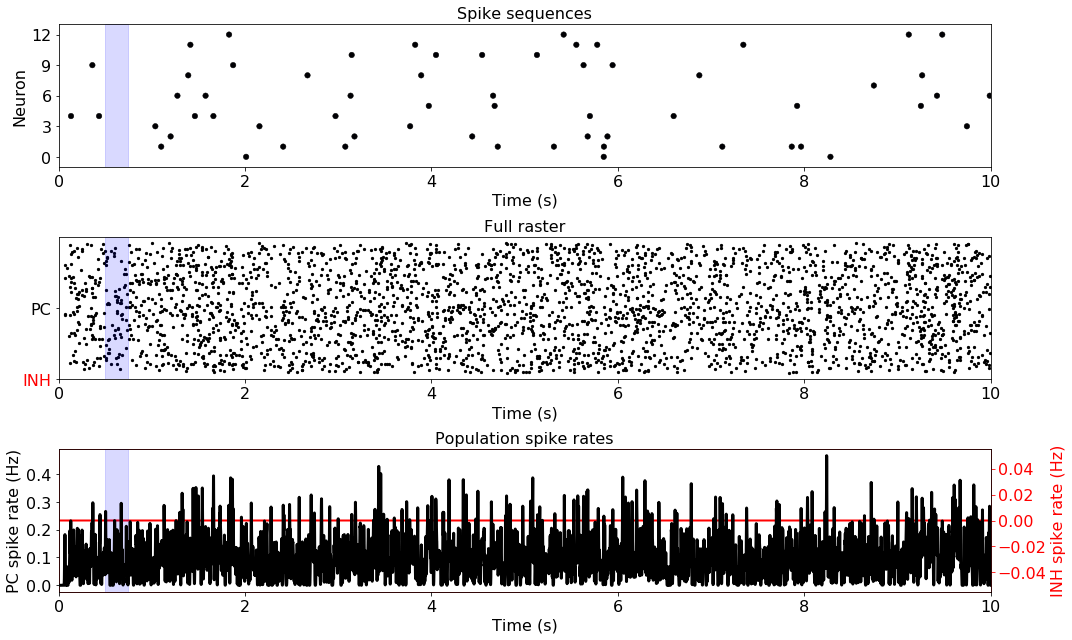

In [6]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_3_L_PC_PC_W_PC_INH.txt',
    smln_id=0,
    rng_seed=0,
    epochs=[(.5, .75)]);

### SWEEP 4: R_G vs SGM_MAX

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'one_way_ct': 0, 'evt_dur': -1, 'evt_ct': 0, 'fr_trj': -1, 'fr_ntrj': -1}
Actual metrics:
{'one_way_ct': 0, 'evt_dur': -1, 'evt_ct': 0, 'fr_trj': -1, 'fr_ntrj': -1}


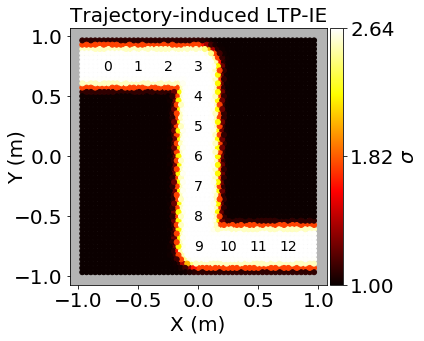

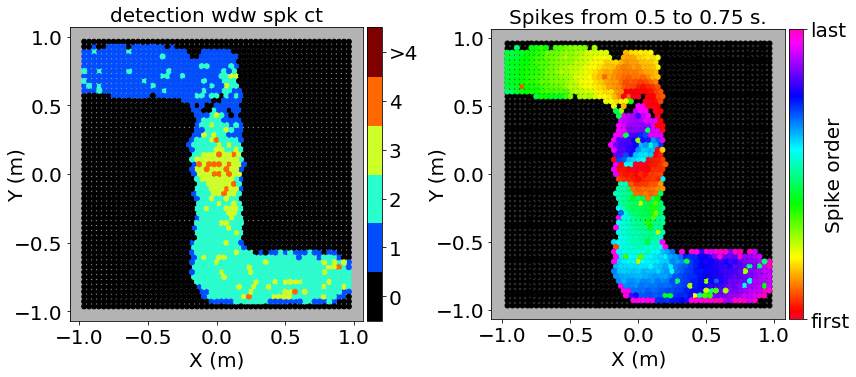

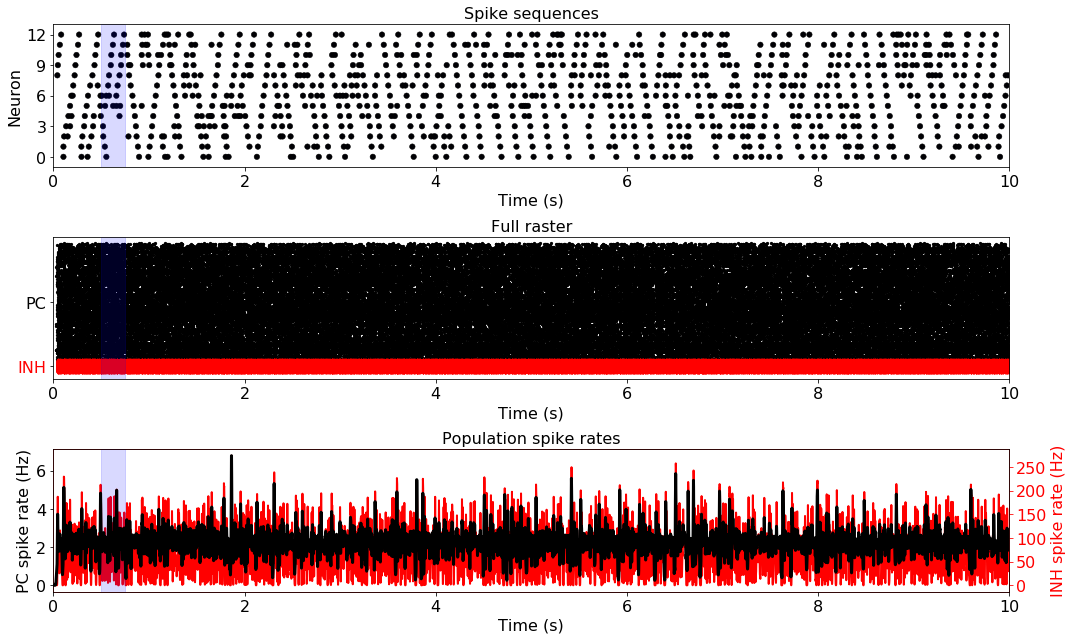

In [9]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_4_R_G_SGM_MAX.txt',
    smln_id=391,
    rng_seed=0,
    epochs=[(.5, .75)]);

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'one_way_ct': 0, 'evt_dur': -1, 'evt_ct': 0, 'fr_trj': -1, 'fr_ntrj': -1}
Actual metrics:
{'one_way_ct': 0, 'evt_dur': -1, 'evt_ct': 0, 'fr_trj': -1, 'fr_ntrj': -1}


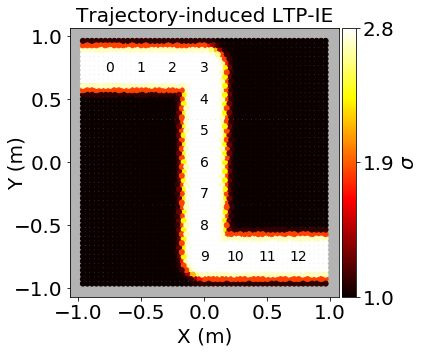

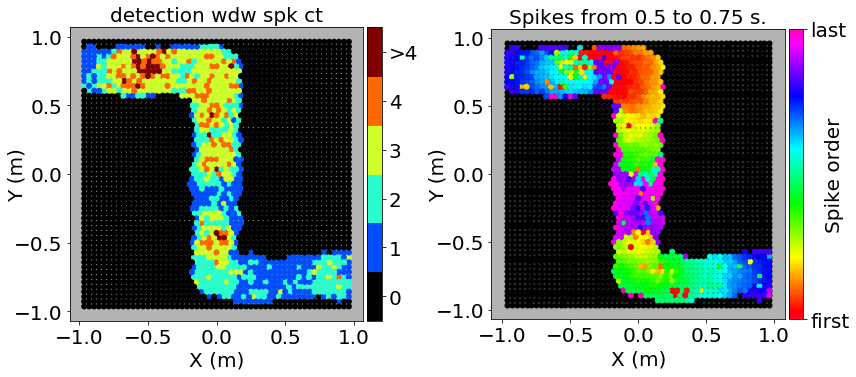

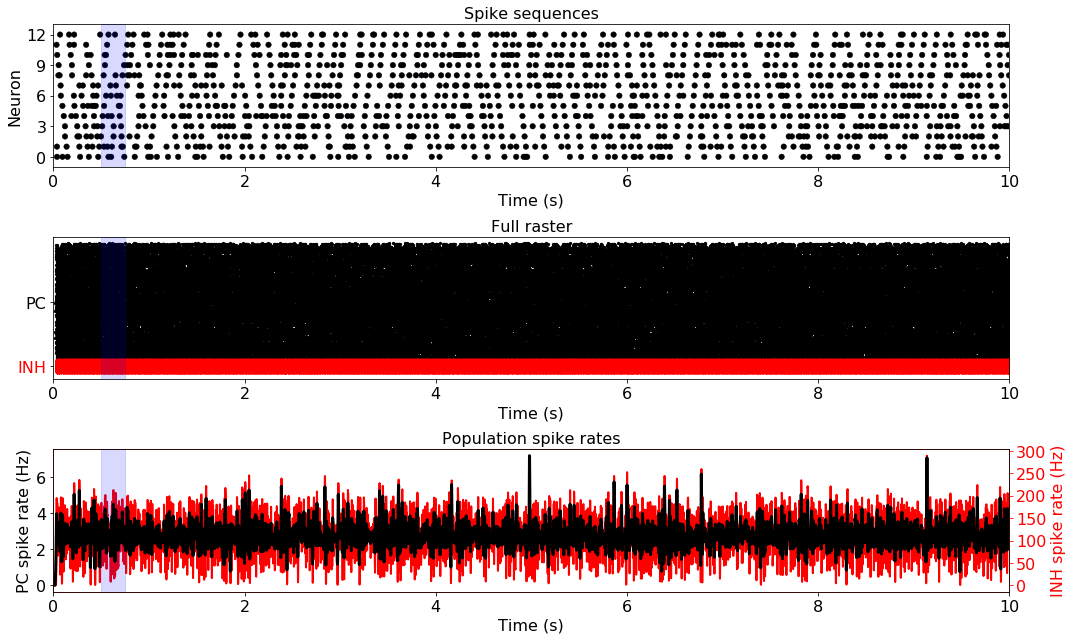

In [10]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_4_R_G_SGM_MAX.txt',
    smln_id=439,
    rng_seed=0,
    epochs=[(.5, .75)]);

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'one_way_ct': 34, 'evt_dur': 0.1258333333333334, 'evt_ct': 57, 'fr_trj': 5.740182462626681, 'fr_ntrj': 0.4394002224714854}
Actual metrics:
{'one_way_ct': 34, 'evt_dur': 0.1258333333333334, 'evt_ct': 57, 'fr_trj': 5.740182462626681, 'fr_ntrj': 0.4394002224714854}


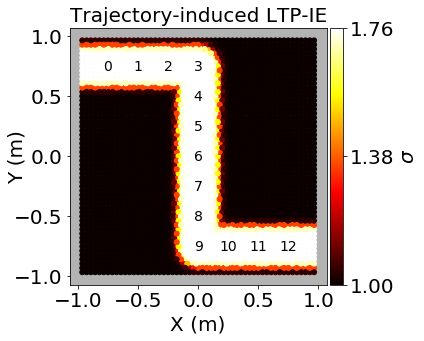

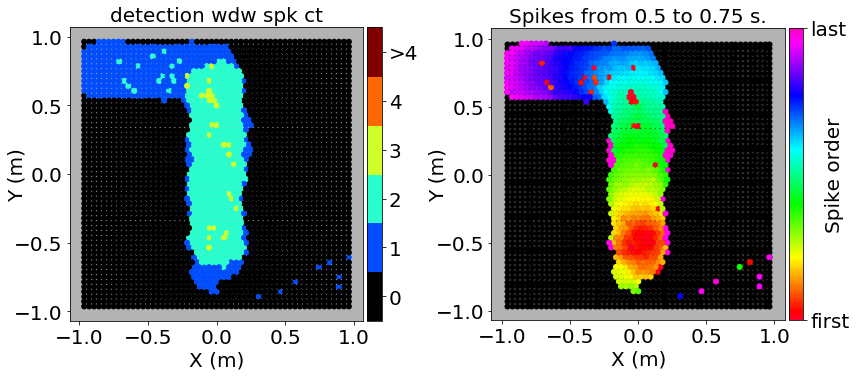

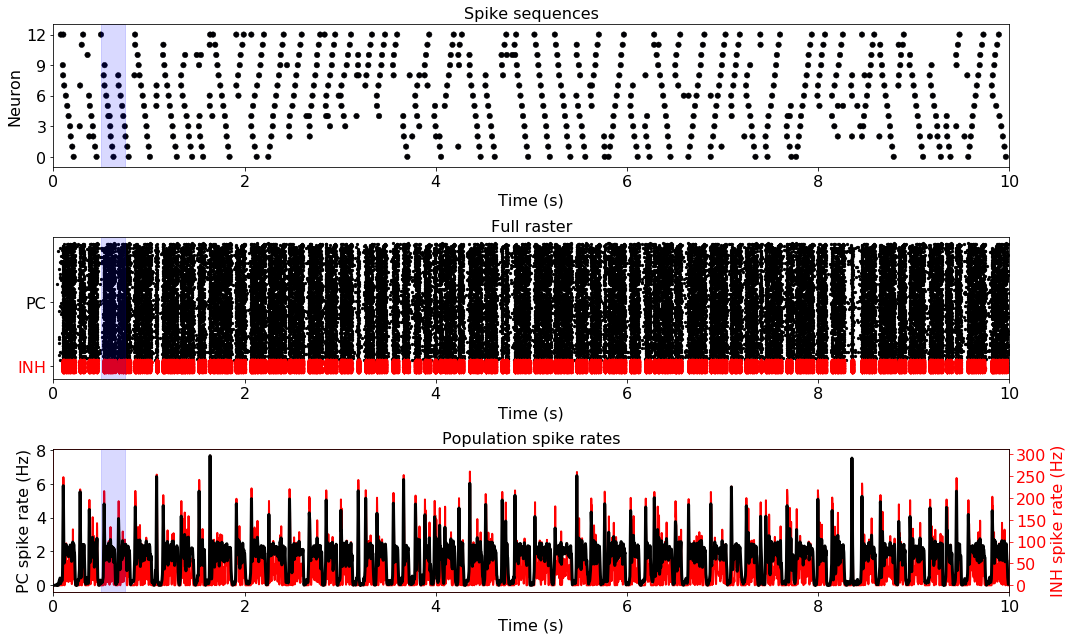

In [11]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_4_R_G_SGM_MAX.txt',
    smln_id=166,
    rng_seed=0,
    epochs=[(.5, .75)]);

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'one_way_ct': 7, 'evt_dur': 0.19834883720930235, 'evt_ct': 43, 'fr_trj': 5.61421011158912, 'fr_ntrj': 0.1789661366955194}
Actual metrics:
{'one_way_ct': 7, 'evt_dur': 0.19834883720930235, 'evt_ct': 43, 'fr_trj': 5.61421011158912, 'fr_ntrj': 0.1789661366955194}


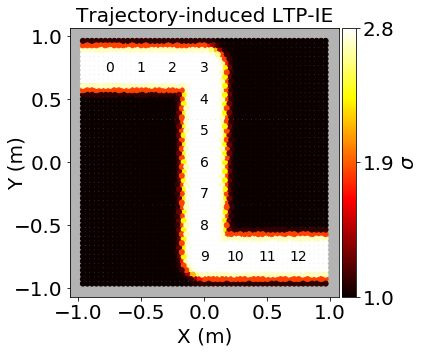

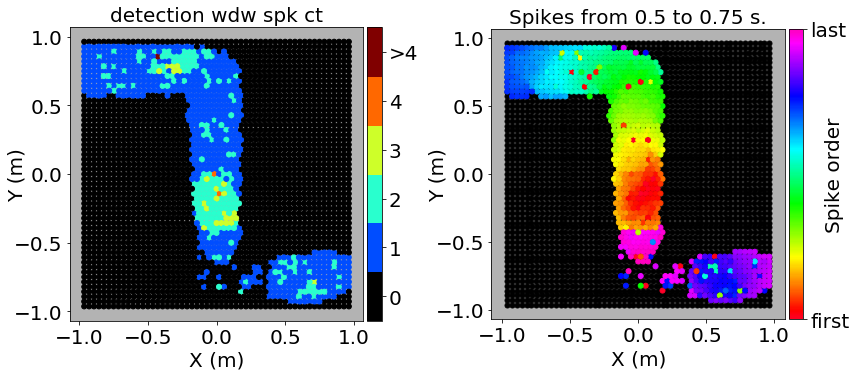

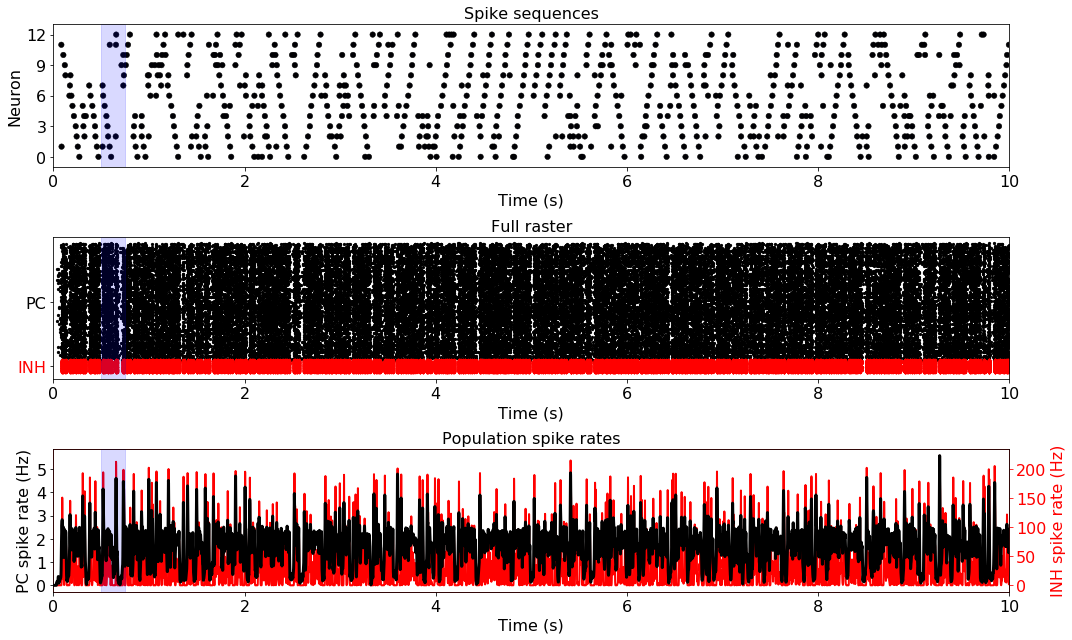

In [13]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_4_R_G_SGM_MAX.txt',
    smln_id=425,
    rng_seed=0,
    epochs=[(.5, .75)]);

### SWEEP 5: R_G vs W_PC_INH

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_trj': -1, 'evt_ct': 0, 'one_way_ct': 0, 'fr_ntrj': -1, 'evt_dur': -1}
Actual metrics:
{'fr_ntrj': -1, 'evt_ct': 0, 'one_way_ct': 0, 'evt_dur': -1, 'fr_trj': -1}


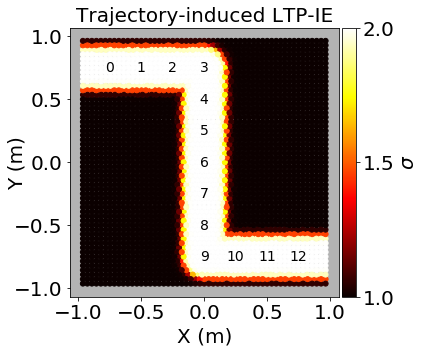

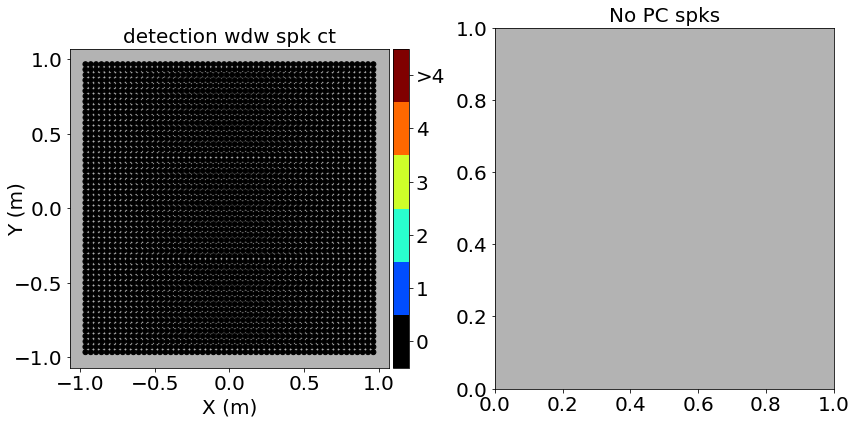

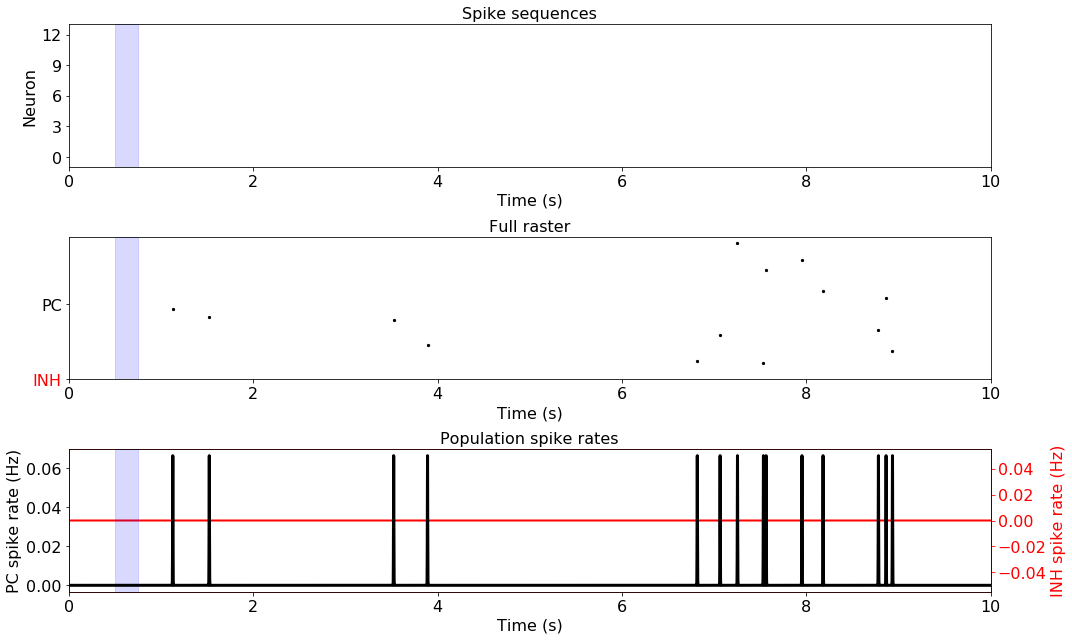

In [8]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_5_R_G_W_PC_INH.txt',
    smln_id=0,
    rng_seed=0,
    epochs=[(.5, .75)]);

## Random param sampling

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_trj': 4.963697890382646, 'evt_dur': 0.14631250000000023, 'evt_ct': 8, 'fr_ntrj': 0.4548753343098808, 'one_way_ct': 8}
Actual metrics:
{'fr_ntrj': 0.4548753343098808, 'evt_ct': 8, 'one_way_ct': 8, 'evt_dur': 0.14631250000000023, 'fr_trj': 4.963697890382646}


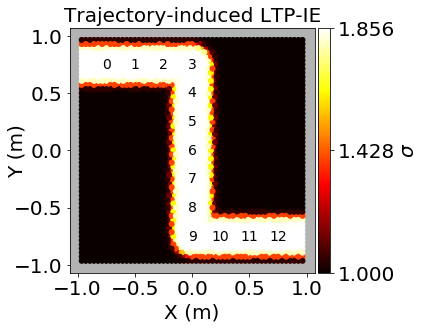

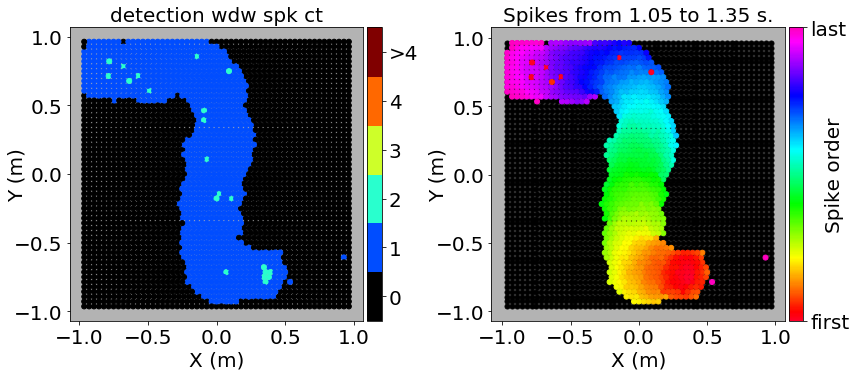

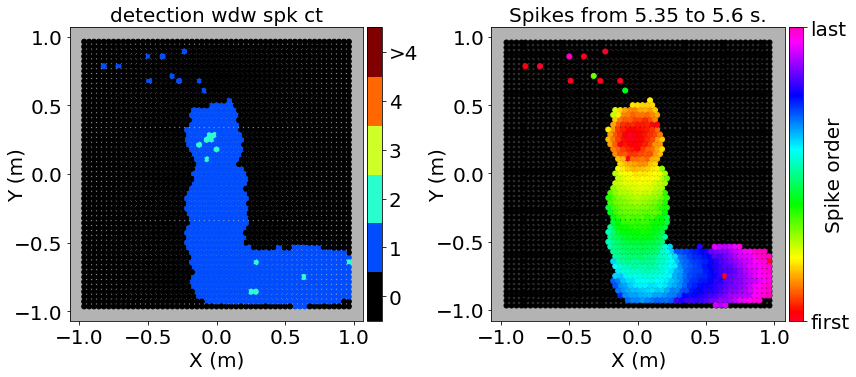

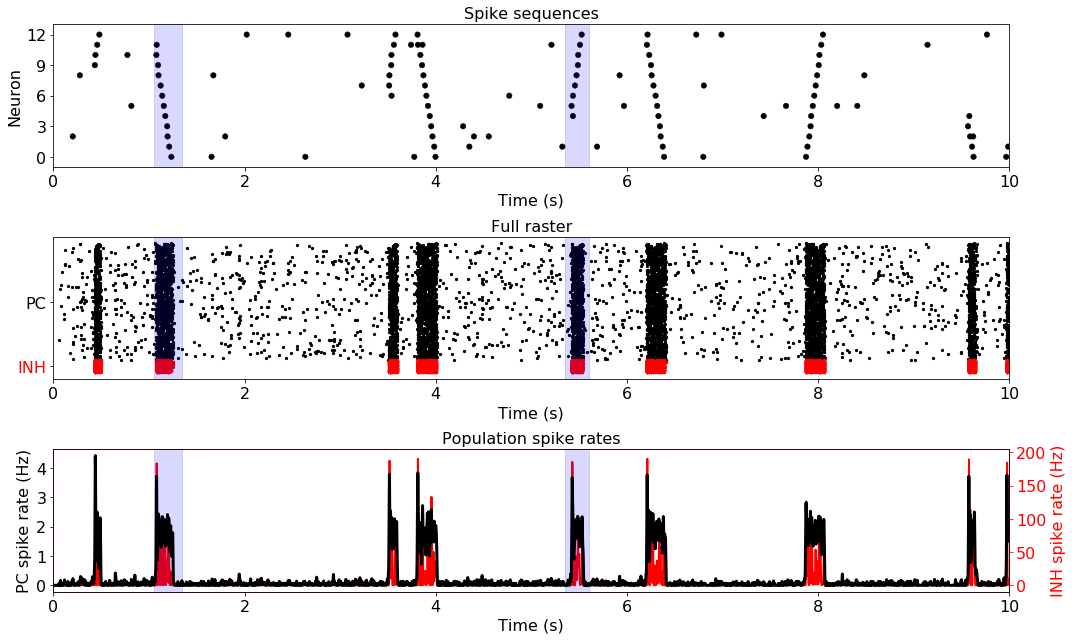

In [9]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_X_RAND_SEARCH.txt',
    smln_id=469,
    rng_seed=0,
    epochs=[(1.05, 1.35), (5.35, 5.6)]);

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_trj': 5.352900662703237, 'evt_dur': 0.10087500000000012, 'evt_ct': 8, 'fr_ntrj': 0.2889255821991044, 'one_way_ct': 4}
Actual metrics:
{'fr_ntrj': 0.2889255821991044, 'evt_ct': 8, 'one_way_ct': 4, 'evt_dur': 0.10087500000000012, 'fr_trj': 5.352900662703237}


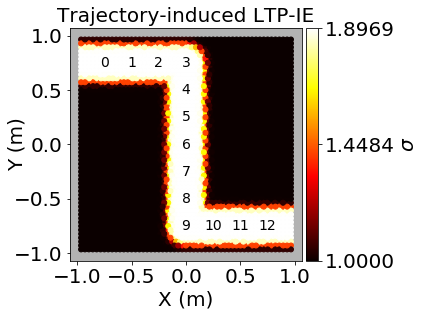

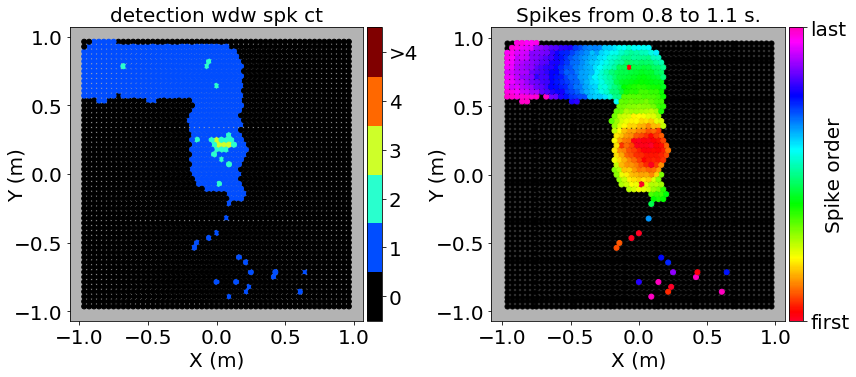

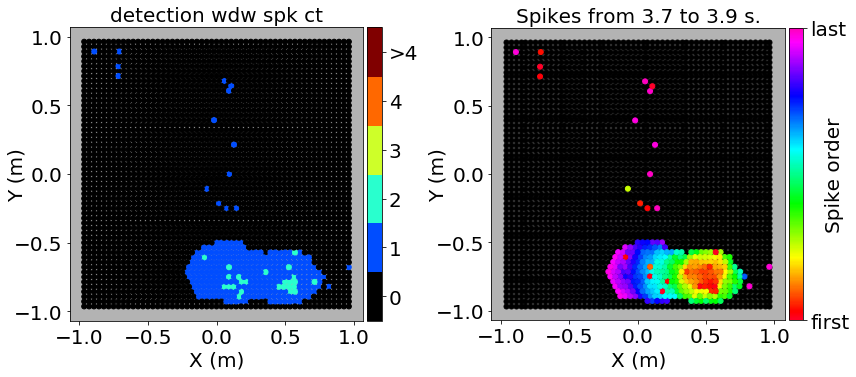

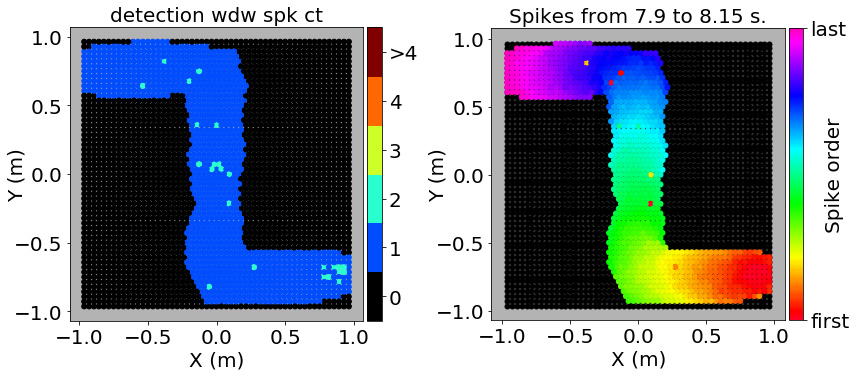

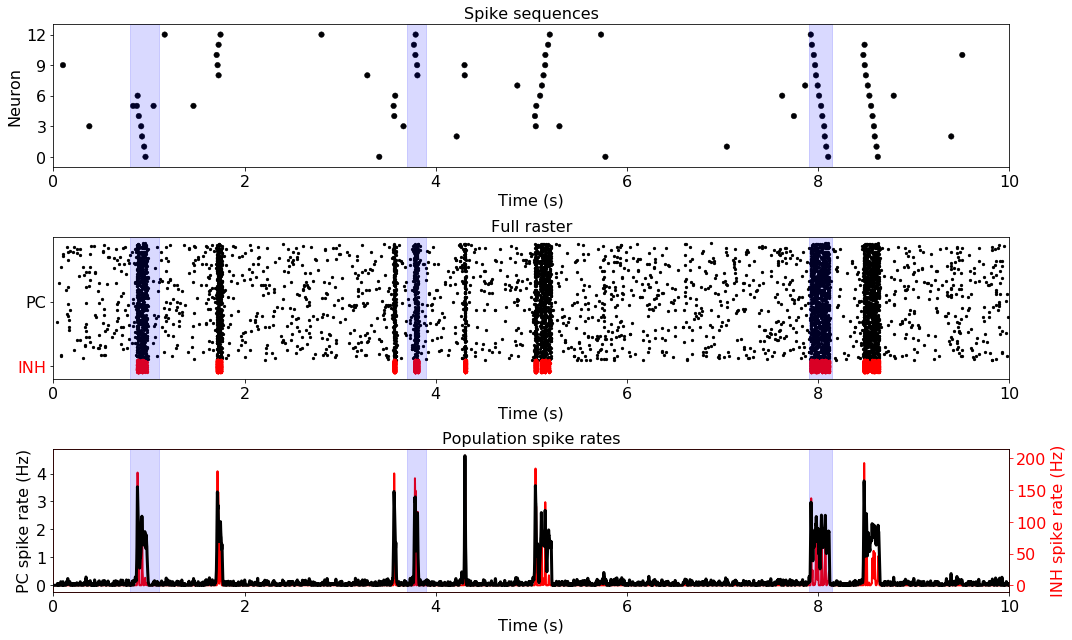

In [10]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_X_RAND_SEARCH.txt',
    smln_id=281,
    rng_seed=4,
    epochs=[(.8, 1.1), (3.7, 3.9), (7.9, 8.15)]);

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_trj': 4.214264755416254, 'evt_dur': 0.05000000000000009, 'evt_ct': 9, 'fr_ntrj': 0.0572151509577677, 'one_way_ct': 0}
Actual metrics:
{'fr_ntrj': 0.0572151509577677, 'evt_ct': 9, 'one_way_ct': 0, 'evt_dur': 0.05000000000000009, 'fr_trj': 4.214264755416254}


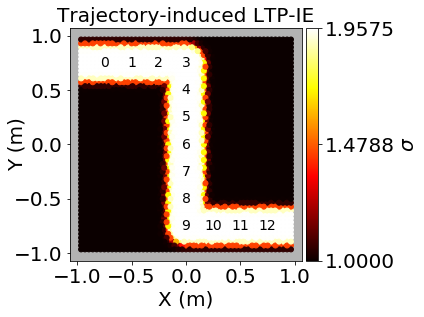

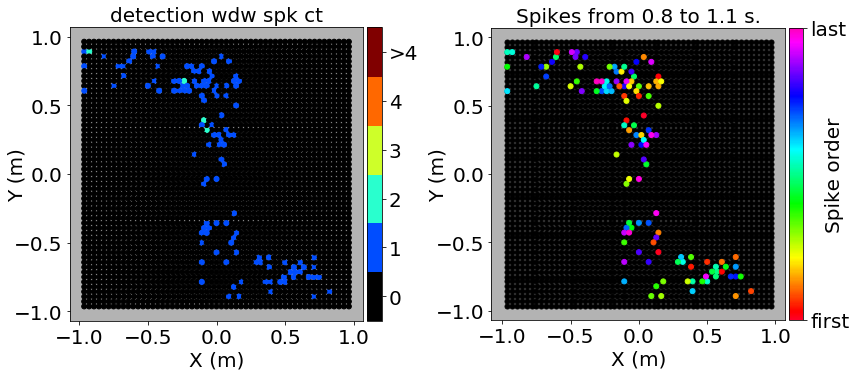

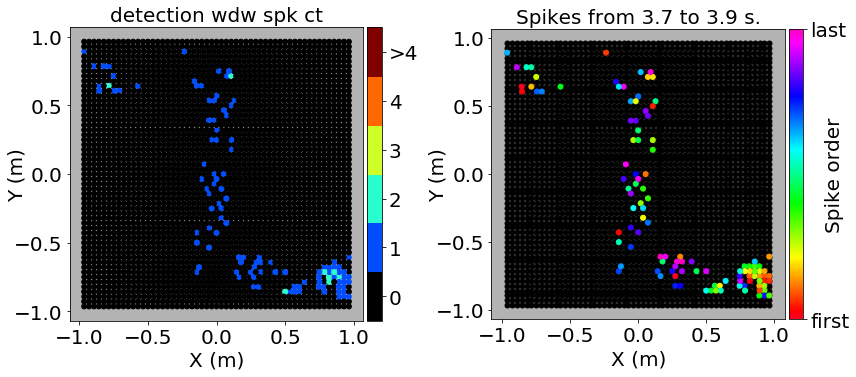

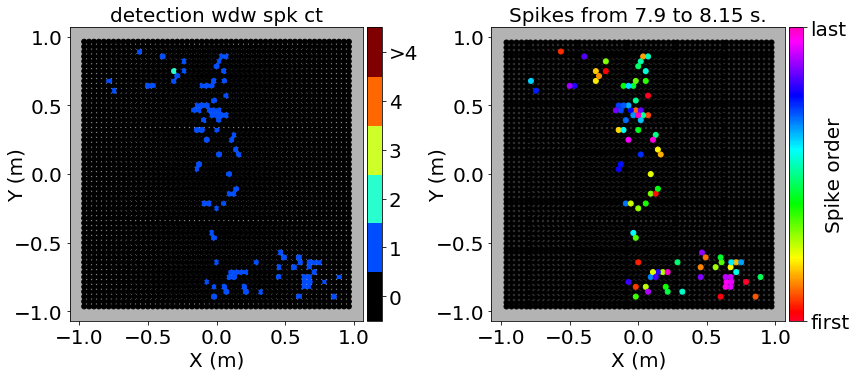

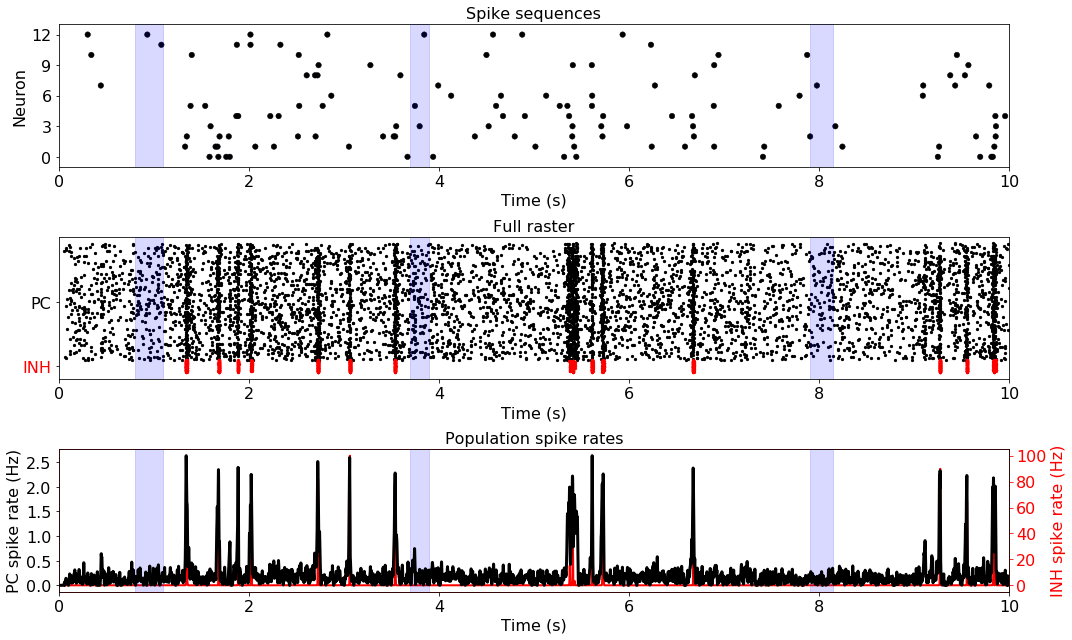

In [11]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_X_RAND_SEARCH.txt',
    smln_id=372,
    rng_seed=0,
    epochs=[(.8, 1.1), (3.7, 3.9), (7.9, 8.15)]);

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Running smln...
Smln complete.
Desired metrics:
{'fr_trj': 4.775678866587954, 'evt_dur': 0.19250000000000012, 'evt_ct': 1, 'fr_ntrj': 0.602793432982112, 'one_way_ct': 1}
Actual metrics:
{'fr_ntrj': 0.602793432982112, 'evt_ct': 1, 'one_way_ct': 1, 'evt_dur': 0.19250000000000012, 'fr_trj': 4.775678866587954}


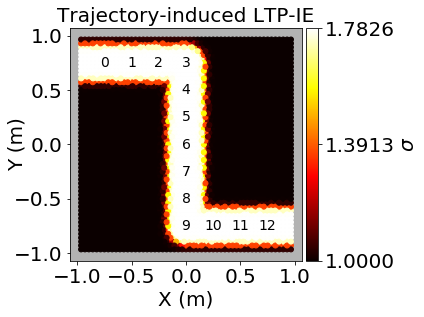

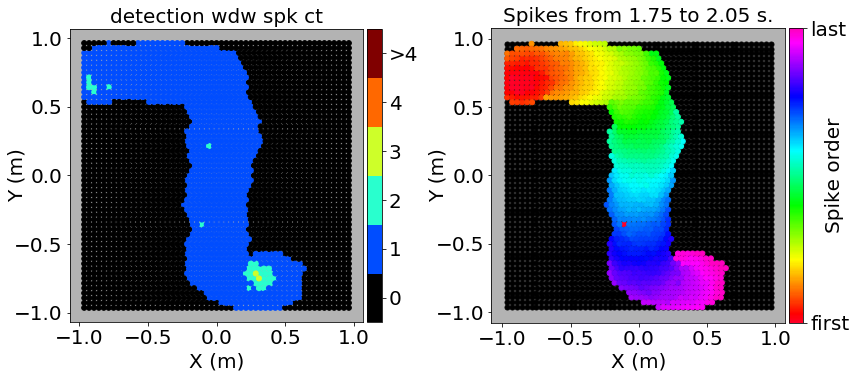

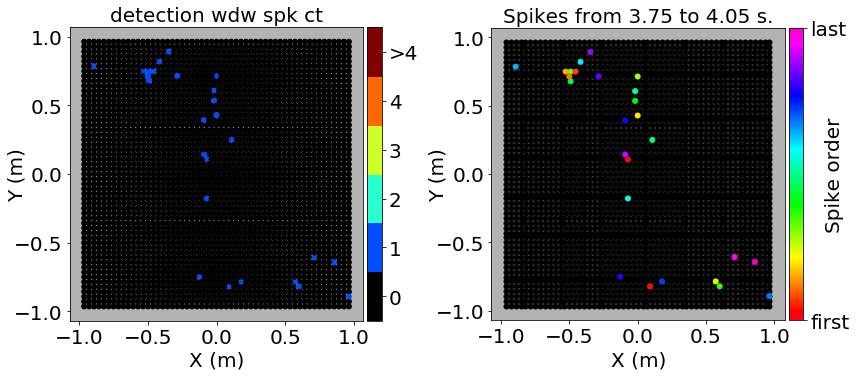

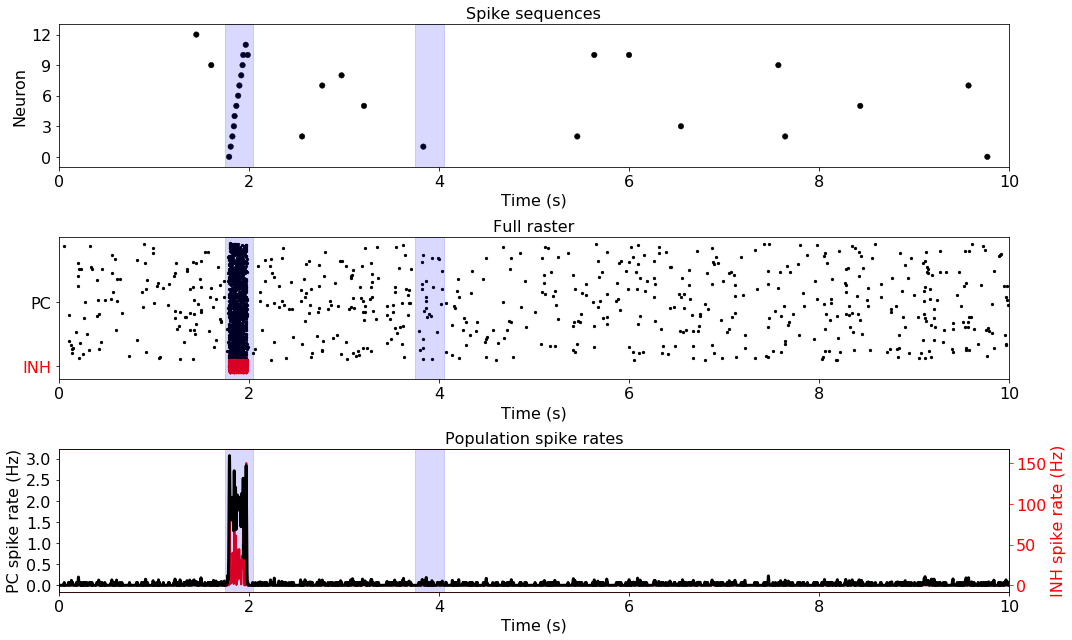

In [12]:
rerun_smln(
    'PARAM_SWEEP_RESULTS_X_RAND_SEARCH.txt',
    smln_id=123,
    rng_seed=0,
    epochs=[(1.75, 2.05), (3.75, 4.05)]);